In [1]:
import pandas as pd
df_t = pd.read_csv('transcript_all.csv')

In [37]:
df_p = pd.read_csv('product_all.csv')

In [2]:
df_c = df_t.groupby('chat_id').text.apply(' '.join)

In [3]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')

/home/tianyi/anaconda3/envs/insight/lib/python3.7/site-packages/sklearn/utils/__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence


In [4]:
txt = df_c.apply(lambda s: tokenizer.tokenize(s.lower()))

In [40]:
pname = df_p.name.apply(lambda s: tokenizer.tokenize(s.lower()))

In [51]:
pname.apply(lambda s: 'coupon' in s).sum()

0

In [5]:
# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['help', 'headout', 'hi', 'hello', 'hey', 'welcome', 'thank', 'check', 'please', 'ok','get', 'yes'])

In [6]:
def remove_stopwords(l):
    return [word for word in l if word not in stop_words]

In [7]:
t_s = list(map(remove_stopwords,txt))

In [8]:
len(t_s)

5386

# Stemming and Lemmatisation

In [10]:
from nltk.stem.porter import PorterStemmer

In [24]:
porter_stemmer = PorterStemmer()
def stem_words(l):
    return [porter_stemmer.stem(words) for words in l]

In [29]:
stem_list = list(map(stem_words,t_s))

In [30]:
import gensim

In [32]:
# Create Dictionary
id2word = gensim.corpora.Dictionary(stem_list)

In [93]:
texts = t_s

In [74]:
texts = [flat_list]

In [33]:
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in stem_list]


In [34]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=200,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [35]:
print(lda_model.print_topics(20))

[(0, '0.068*"pick" + 0.049*"hotel" + 0.046*"safari" + 0.036*"transfer" + 0.028*"dubai" + 0.025*"desert" + 0.024*"drop" + 0.019*"point" + 0.018*"locat" + 0.016*"stay"'), (1, '0.065*"minut" + 0.065*"sorri" + 0.041*"wait" + 0.035*"back" + 0.029*"time" + 0.026*"today" + 0.025*"give" + 0.020*"assur" + 0.019*"august" + 0.019*"thank"'), (2, '0.104*"ticket" + 0.050*"price" + 0.039*"2" + 0.033*"adult" + 0.027*"buy" + 0.027*"year" + 0.025*"need" + 0.024*"3" + 0.023*"1" + 0.020*"kid"'), (3, '0.118*"seat" + 0.052*"show" + 0.030*"ticket" + 0.029*"select" + 0.026*"avail" + 0.025*"price" + 0.022*"section" + 0.019*"today" + 0.019*"best" + 0.018*"offic"'), (4, '0.046*"ride" + 0.041*"includ" + 0.038*"world" + 0.024*"18" + 0.023*"top" + 0.022*"quickli" + 0.020*"ferrari" + 0.017*"50" + 0.016*"gener" + 0.016*"si"'), (5, '0.039*"burj" + 0.033*"khalifa" + 0.033*"en" + 0.023*"por" + 0.022*"checkout" + 0.019*"que" + 0.019*"para" + 0.018*"aquarium" + 0.017*"refresh" + 0.017*"lo"'), (6, '0.025*"morn" + 0.024*"en

In [56]:
texts = stem_list

# Number of clusters

In [184]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [187]:
%%time
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=stem_list, start=10, limit=40, step=6)

/home/tianyi/anaconda3/envs/insight/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/home/tianyi/anaconda3/envs/insight/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/home/tianyi/anaconda3/envs/insight/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin ins

/home/tianyi/anaconda3/envs/insight/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/home/tianyi/anaconda3/envs/insight/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/home/tianyi/anaconda3/envs/insight/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin ins

/home/tianyi/anaconda3/envs/insight/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/home/tianyi/anaconda3/envs/insight/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/home/tianyi/anaconda3/envs/insight/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin ins

/home/tianyi/anaconda3/envs/insight/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/home/tianyi/anaconda3/envs/insight/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/home/tianyi/anaconda3/envs/insight/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin ins

/home/tianyi/anaconda3/envs/insight/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/home/tianyi/anaconda3/envs/insight/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/home/tianyi/anaconda3/envs/insight/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin ins

/home/tianyi/anaconda3/envs/insight/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/home/tianyi/anaconda3/envs/insight/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/home/tianyi/anaconda3/envs/insight/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin ins

/home/tianyi/anaconda3/envs/insight/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/home/tianyi/anaconda3/envs/insight/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/home/tianyi/anaconda3/envs/insight/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin ins

/home/tianyi/anaconda3/envs/insight/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/home/tianyi/anaconda3/envs/insight/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/home/tianyi/anaconda3/envs/insight/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin ins

/home/tianyi/anaconda3/envs/insight/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/home/tianyi/anaconda3/envs/insight/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/home/tianyi/anaconda3/envs/insight/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin ins

/home/tianyi/anaconda3/envs/insight/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/home/tianyi/anaconda3/envs/insight/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/home/tianyi/anaconda3/envs/insight/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin ins

/home/tianyi/anaconda3/envs/insight/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/home/tianyi/anaconda3/envs/insight/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/home/tianyi/anaconda3/envs/insight/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin ins

/home/tianyi/anaconda3/envs/insight/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/home/tianyi/anaconda3/envs/insight/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/home/tianyi/anaconda3/envs/insight/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin ins

/home/tianyi/anaconda3/envs/insight/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/home/tianyi/anaconda3/envs/insight/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/home/tianyi/anaconda3/envs/insight/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin ins

/home/tianyi/anaconda3/envs/insight/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/home/tianyi/anaconda3/envs/insight/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/home/tianyi/anaconda3/envs/insight/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin ins

/home/tianyi/anaconda3/envs/insight/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/home/tianyi/anaconda3/envs/insight/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/home/tianyi/anaconda3/envs/insight/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin ins

/home/tianyi/anaconda3/envs/insight/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/home/tianyi/anaconda3/envs/insight/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/home/tianyi/anaconda3/envs/insight/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin ins

/home/tianyi/anaconda3/envs/insight/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/home/tianyi/anaconda3/envs/insight/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/home/tianyi/anaconda3/envs/insight/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin ins

/home/tianyi/anaconda3/envs/insight/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/home/tianyi/anaconda3/envs/insight/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/home/tianyi/anaconda3/envs/insight/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin ins

/home/tianyi/anaconda3/envs/insight/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/home/tianyi/anaconda3/envs/insight/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/home/tianyi/anaconda3/envs/insight/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin ins

/home/tianyi/anaconda3/envs/insight/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/home/tianyi/anaconda3/envs/insight/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/home/tianyi/anaconda3/envs/insight/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin ins

/home/tianyi/anaconda3/envs/insight/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/home/tianyi/anaconda3/envs/insight/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/home/tianyi/anaconda3/envs/insight/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin ins

/home/tianyi/anaconda3/envs/insight/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/home/tianyi/anaconda3/envs/insight/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/home/tianyi/anaconda3/envs/insight/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin ins

/home/tianyi/anaconda3/envs/insight/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/home/tianyi/anaconda3/envs/insight/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/home/tianyi/anaconda3/envs/insight/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin ins

/home/tianyi/anaconda3/envs/insight/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/home/tianyi/anaconda3/envs/insight/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/home/tianyi/anaconda3/envs/insight/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin ins

/home/tianyi/anaconda3/envs/insight/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/home/tianyi/anaconda3/envs/insight/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/home/tianyi/anaconda3/envs/insight/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin ins

/home/tianyi/anaconda3/envs/insight/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/home/tianyi/anaconda3/envs/insight/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/home/tianyi/anaconda3/envs/insight/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin ins

/home/tianyi/anaconda3/envs/insight/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/home/tianyi/anaconda3/envs/insight/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/home/tianyi/anaconda3/envs/insight/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin ins

/home/tianyi/anaconda3/envs/insight/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/home/tianyi/anaconda3/envs/insight/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/home/tianyi/anaconda3/envs/insight/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin ins

/home/tianyi/anaconda3/envs/insight/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/home/tianyi/anaconda3/envs/insight/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/home/tianyi/anaconda3/envs/insight/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin ins

/home/tianyi/anaconda3/envs/insight/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/home/tianyi/anaconda3/envs/insight/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/home/tianyi/anaconda3/envs/insight/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin ins

/home/tianyi/anaconda3/envs/insight/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/home/tianyi/anaconda3/envs/insight/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/home/tianyi/anaconda3/envs/insight/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin ins

/home/tianyi/anaconda3/envs/insight/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/home/tianyi/anaconda3/envs/insight/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/home/tianyi/anaconda3/envs/insight/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin ins

/home/tianyi/anaconda3/envs/insight/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/home/tianyi/anaconda3/envs/insight/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/home/tianyi/anaconda3/envs/insight/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin ins

/home/tianyi/anaconda3/envs/insight/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/home/tianyi/anaconda3/envs/insight/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/home/tianyi/anaconda3/envs/insight/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin ins

/home/tianyi/anaconda3/envs/insight/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/home/tianyi/anaconda3/envs/insight/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/home/tianyi/anaconda3/envs/insight/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin ins

/home/tianyi/anaconda3/envs/insight/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/home/tianyi/anaconda3/envs/insight/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/home/tianyi/anaconda3/envs/insight/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin ins

/home/tianyi/anaconda3/envs/insight/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/home/tianyi/anaconda3/envs/insight/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/home/tianyi/anaconda3/envs/insight/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin ins

/home/tianyi/anaconda3/envs/insight/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/home/tianyi/anaconda3/envs/insight/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/home/tianyi/anaconda3/envs/insight/lib/python3.7/site-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.from_iter(generator)) or the python sum builtin ins

CPU times: user 42.4 s, sys: 1.58 s, total: 44 s
Wall time: 2min 13s


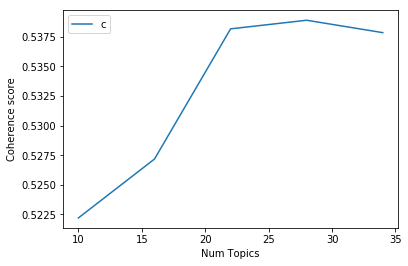

In [189]:
# Show graph
limit=40; start=10; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [190]:
coherence_values

[0.5221952439768118,
 0.5271743128117929,
 0.5381800091859602,
 0.538907728857153,
 0.5378593080960193]

In [181]:
len(corpus[:10])

10

In [52]:
# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline


/home/tianyi/anaconda3/envs/insight/lib/python3.7/site-packages/funcy/colls.py:6: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Mapping, Set, Iterable, Iterator, defaultdict
/home/tianyi/anaconda3/envs/insight/lib/python3.7/site-packages/funcy/colls.py:6: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Mapping, Set, Iterable, Iterator, defaultdict
/home/tianyi/anaconda3/envs/insight/lib/python3.7/site-packages/funcy/flow.py:2: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Hashable


In [53]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

/home/tianyi/anaconda3/envs/insight/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
15     0.172569 -0.005297       1        1  8.637649
19     0.104707 -0.062776       2        1  7.152663
8      0.153214 -0.046742       3        1  7.007789
3      0.138164  0.020005       4        1  6.784483
1      0.084355  0.029964       5        1  6.454521
11     0.123375  0.012751       6        1  6.361392
2      0.111177  0.009402       7        1  6.223743
18     0.147730  0.043023       8        1  5.380508
16     0.107056  0.027511       9        1  5.276488
12    -0.152257  0.176553      10        1  5.078658
13    -0.065102  0.037482      11        1  4.996429
14    -0.235662  0.141666      12        1  4.394115
6     -0.018741  0.147510      13        1  4.212449
17    -0.021630 -0.010934      14        1  4.007775
10    -0.036523 -0.002417      15        1  3.904560
0     -0.127726  0.186569      16        1  3.786766
7      0.000077 -0.168819      17        1  2.763432
4     -0.286772 -0.067302      18        1  2.651999
9      0.011533 -0.140095      19        1  2.566279
5     -0.209545 -0.328054      20        1  2.358311, topic_info=     Category          Freq       Term         Total  loglift  logprob
term                                                                  
76    Default  12595.000000       tour  12595.000000  30.0000  30.0000
5     Default  28140.000000     ticket  28140.000000  29.0000  29.0000
761   Default  22921.000000      today  22921.000000  28.0000  28.0000
286   Default   8528.000000       seat   8528.000000  27.0000  27.0000
155   Default   8052.000000      would   8052.000000  26.0000  26.0000
50    Default   9574.000000       time   9574.000000  25.0000  25.0000
141   Default   8199.000000        day   8199.000000  24.0000  24.0000
153   Default   5635.000000        tri   5635.000000  23.0000  23.0000
7     Default   5617.000000     assist   5617.000000  22.0000  22.0000
10    Default  17415.000000       book  17415.000000  21.0000  21.0000
276   Default   3654.000000       line   3654.000000  20.0000  20.0000
222   Default   5432.000000       like   5432.000000  19.0000  19.0000
60    Default   5182.000000      dubai   5182.000000  18.0000  18.0000
41    Default   5274.000000      minut   5274.000000  17.0000  17.0000
59    Default   5059.000000        com   5059.000000  16.0000  16.0000
64    Default   3854.000000       http   3854.000000  15.0000  15.0000
9     Default   7398.000000      avail   7398.000000  14.0000  14.0000
396   Default   4663.000000     reserv   4663.000000  13.0000  13.0000
385   Default   4567.000000      email   4567.000000  12.0000  12.0000
251   Default   5413.000000        use   5413.000000  11.0000  11.0000
227   Default   5073.000000      price   5073.000000  10.0000  10.0000
703   Default   3287.000000       guid   3287.000000   9.0000   9.0000
18    Default   4733.000000       free   4733.000000   8.0000   8.0000
121   Default   7215.000000      sorri   7215.000000   7.0000   7.0000
32    Default   3275.000000         30   3275.000000   6.0000   6.0000
226   Default   2992.000000       pass   2992.000000   5.0000   5.0000
171   Default   3030.000000       pick   3030.000000   4.0000   4.0000
26    Default   5672.000000       show   5672.000000   3.0000   3.0000
280   Default   2519.000000       skip   2519.000000   2.0000   2.0000
743   Default   3009.000000         pm   3009.000000   1.0000   1.0000
...       ...           ...        ...           ...      ...      ...
6858  Topic20    348.380951    entrada    349.073212   3.7452  -4.2775
6496  Topic20    318.966095         es    319.658356   3.7451  -4.3657
492   Topic20    277.436401    dolphin    278.128662   3.7447  -4.5052
6860  Topic20    261.581543     gracia    262.273804   3.7446  -4.5641
7039  Topic20    245.545441    reserva    246.237701   3.7444  -4.6273
2333  Topic20    226.970840        vip    227.663101   3.7442  -4.7060
1481  Topic20    177.5

In [94]:
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

In [ ]:
# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

In [104]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=200,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [63]:
stem_list[0]

['may', 'may', 'may', 'may']

In [99]:
lda_corpus = lda_model[corpus]

In [145]:
for i, row in enumerate(lda_model[corpus][0:2]):
    a = row[0]

In [148]:
a

[(0, 0.010541159),
 (1, 0.030457543),
 (2, 0.021681383),
 (3, 0.016157323),
 (4, 0.01334195),
 (6, 0.019836184),
 (7, 0.0117169665),
 (8, 0.025330672),
 (9, 0.013949579),
 (10, 0.015988635),
 (11, 0.6281626),
 (12, 0.014590886),
 (13, 0.019296717),
 (14, 0.015437157),
 (15, 0.03519937),
 (16, 0.022674175),
 (17, 0.013949578),
 (18, 0.0150640085),
 (19, 0.04762671)]

In [151]:
sorted(a, key=lambda x: (x[1]))

[(0, 0.010541159),
 (7, 0.0117169665),
 (4, 0.01334195),
 (17, 0.013949578),
 (9, 0.013949579),
 (12, 0.014590886),
 (18, 0.0150640085),
 (14, 0.015437157),
 (10, 0.015988635),
 (3, 0.016157323),
 (13, 0.019296717),
 (6, 0.019836184),
 (2, 0.021681383),
 (16, 0.022674175),
 (8, 0.025330672),
 (1, 0.030457543),
 (15, 0.03519937),
 (19, 0.04762671),
 (11, 0.6281626)]

In [173]:
def format_topics_sentences(ldamodel, corpus, texts):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row[0], key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts).reset_index(drop=True)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(lda_model, corpus, df_c)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,11.0,0.6281,"book, reserv, email, ticket, confirm, receiv, ...",Hello. How may I help you? Hello. How may I he...
1,1,11.0,0.6281,"book, reserv, email, ticket, confirm, receiv, ...",Hello. How may I help you? Hello. How may I he...
2,2,11.0,0.6281,"book, reserv, email, ticket, confirm, receiv, ...",Hello. How may I help you? Hello. How may I he...
3,3,11.0,0.6282,"book, reserv, email, ticket, confirm, receiv, ...",Hello. How may I help you? Hello. How may I he...
4,4,2.0,0.9073,"ticket, price, 2, adult, buy, year, need, 3, 1...",Hello. How may I help you? Hi! How are! My chi...
5,5,8.0,0.5329,"assist, ticket, free, feel, us, need, step, an...",Hello. How may I help you? What are the dates ...
6,6,8.0,0.4594,"assist, ticket, free, feel, us, need, step, an...",Hello. How may I help you? How much time to ta...
7,7,12.0,0.8105,"tour, dubai, http, com, www, citi, link, cruis...",Hello. How may I help you? Hi Phil i had an en...
8,8,12.0,0.2884,"tour, dubai, http, com, www, citi, link, cruis...",Hello. How may I help you? Looking for two tic...
9,9,15.0,0.3459,"ticket, book, today, avail, date, septemb, tow...",Hello. How may I help you? I wanted to book yo...


In [158]:
sum(df_dominant_topic.Dominant_Topic == 15)

655

In [61]:
# Print the Keyword in the 10 topics
lda_model.print_topics(20)

[(0,
  '0.068*"pick" + 0.049*"hotel" + 0.046*"safari" + 0.036*"transfer" + 0.028*"dubai" + 0.025*"desert" + 0.024*"drop" + 0.019*"point" + 0.018*"locat" + 0.016*"stay"'),
 (1,
  '0.065*"minut" + 0.065*"sorri" + 0.041*"wait" + 0.035*"back" + 0.029*"time" + 0.026*"today" + 0.025*"give" + 0.020*"assur" + 0.019*"august" + 0.019*"thank"'),
 (2,
  '0.104*"ticket" + 0.050*"price" + 0.039*"2" + 0.033*"adult" + 0.027*"buy" + 0.027*"year" + 0.025*"need" + 0.024*"3" + 0.023*"1" + 0.020*"kid"'),
 (3,
  '0.118*"seat" + 0.052*"show" + 0.030*"ticket" + 0.029*"select" + 0.026*"avail" + 0.025*"price" + 0.022*"section" + 0.019*"today" + 0.019*"best" + 0.018*"offic"'),
 (4,
  '0.046*"ride" + 0.041*"includ" + 0.038*"world" + 0.024*"18" + 0.023*"top" + 0.022*"quickli" + 0.020*"ferrari" + 0.017*"50" + 0.016*"gener" + 0.016*"si"'),
 (5,
  '0.039*"burj" + 0.033*"khalifa" + 0.033*"en" + 0.023*"por" + 0.022*"checkout" + 0.019*"que" + 0.019*"para" + 0.018*"aquarium" + 0.017*"refresh" + 0.017*"lo"'),
 (6,
  '0.02

In [171]:
df_c.apply(lambda s: 'price' in s).sum()

609

In [169]:
df_c.apply(lambda s: 'available' in s).sum()

791

In [180]:
df_c.loc[df_c.apply(lambda s: 'confirmation' in s)].iloc[40]

"Hey there  good morning.  I'm looking at belvedere colosseum tour of top tiers.  Does it include skip line acess to forum and palatine hill? Unfortunately it does not include skip line access to forum and palatine hill thanks. we will do the gladiator entrance then.  Another question.  I received confirmation email for order #253591 but not the ticket voucher email.  Can you please resend it?  Let me check that thanks Sent the voucher again. got it.  thanks for your help.  Been very happy with your services so far You're Welcome is there anything else I can help you with ? not right now Thank you for contacting Headout. Hey there  good morning.  I'm looking at belvedere colosseum tour of top tiers.  Does it include skip line acess to forum and palatine hill? Unfortunately it does not include skip line access to forum and palatine hill thanks. we will do the gladiator entrance then.  Another question.  I received confirmation email for order #253591 but not the ticket voucher email.  C

In [123]:
df_c.apply(lambda s: 'booking' in s).sum()

1008

In [118]:
df_c.apply(lambda s: 'refund' in s).sum()

163

In [173]:
df_c.apply(lambda s: 'email' in s).sum()

567

In [122]:
df_c.apply(lambda s: 'reservation' in s).sum()

564

In [172]:
609/5386

0.11307092461938359